## Presentation Outline 

- Introduction: What are Multiscale Methods?
- Basis Expansion Methods
- Data-Adaptive Approaches
- My Recent Research Interests

# Introduction

---



### 이상한 변호사 우영우 (2022)
 


> 이상한 변호사 우영우 (2022) 7부, 우영우가 많은 문서들 사이에서 필요한 문구를 기억하는 장면

<div style="text-align: center;">
  <iframe width="855" height="472.5" 
    src="https://www.youtube.com/embed/5J1B6845VkM?start=96&end=160" 
    title="YouTube video player" frameborder="0" 
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" 
    allowfullscreen>
  </iframe>
</div>

---


### What are Multiscale Methods?
 


A Multiresolution Analysis (MRA) of $L^2(\mathbb{R})$ is a sequence of closed subspaces $\{V_j\}_{j \in \mathbb{Z}}$ such that:

- $V_j \subset V_{j+1}$
- $\overline{\bigcup_j V_j} = L^2(\mathbb{R})$, $\bigcap_j V_j = \{0\}$
- $f(x) \in V_j \iff f(2x) \in V_{j+1}$
- $f(x) \in V_0 \Rightarrow f(x - k) \in V_0$ for all $k \in \mathbb{Z}$

These spaces represent signals at different resolutions and form the basis for wavelet analysis.

---



### What are Multiscale Methods?
 


By adopting the definition from @nason2008wavelet, a multiscale method can be described as 

> "Multiscale methods are approaches that represent data at multiple scales and managing this representation simultaneously."

---



### Principal Component Analysis
 


- The most well-known multiscale method in signal processing is Fourier transform.
- But for data scientists, the most familiar multiscale method is likely PCA (Principal Component Analysis).

---



### Principal Component Analysis
 


- PCA is a technique that considers the covariance between variables in the original data and creates new axes called principal components.
- The first principal component determines the direction of maximum variance, and subsequent principal components are orthogonal to the previous principal components and maximize the remaining variance.

---



### Principal Component Analysis
 


- When only a few initial components are used to represent data, this is often described as a dimensionality reduction of data.

![Figure^[from <https://guebin.github.io/SC2024/14wk-1.html>]:
Visualization of the Iris dataset before and after dimensionality reduction.
The left panel shows the original 3D projection of the data, while the right panel shows the reconstruction after projecting onto the first two principal components and then mapping back to the original space.](figs/irispca.png){fig-align="center"}

---



### Principal Component Analysis
 


-  From a multiscale perspective, this can be described as viewing data on a "global scale" or "coarsening data".

![Figure: Illustration of the multiscale interpretation of Principal Component Analysis (PCA).
Viewing the data through the first few principal components provides a coarse, global summary, while the later components capture finer, local details.](figs/mspca.jpg){fig-align="center"}

---



### Principal Component Analysis
 


| **PCA Term**               | **Multiscale Interpretation**        | 
|---------------------------|--------------------------------------|
| Principal Component (PC)  | Scale-specific representation        | 
| Eigenvalue decomposition  | Decomposition into multiple scales   |
| Leading components        | Coarse scale / Global structure      |
| Trailing components       | Fine scale / Local detail            | 

---


### Multiscale Thinking in Practice

| **Application**               | **Multiscale Interpretation**                                | 
|------------------------------|----------------------------------------------------------------|
| Dimensionality Reduction     | Keeping only a few essential (coarse) scales                  | 
| Denoising / Estimation | Using only strong or dominant scales                         |
| Detection  | Focusing on specific scales where phenomena are visible       | 
| Multiscale Visualization     | Showing magnitude across all scales                           | 

---


### Multiscale Thinking in Practice

![Figure: Schematic illustration of multiscale decomposition and its applications.
By decomposing data into multiple scales, one can enable various tasks such as dimensionality reduction, denoising, anomaly detection, and multiscale visualization.](figs/msapplications.png){fig-align="center"}

---


### Simpson's Paradox


- Imagine we’re looking at the free throw performance of two basketball players, A and B.
Suppose that in each season, Player B had a higher success rate than Player A.

- Even so, could it be that Player A ends up with a higher overall success rate when we combine the data from both seasons?


---



### Simpson's Paradox



| Player | Season 1 | Season 2 | Overall |
|--------|----------|----------|---------|
| A | 70% (7/10) | 95% (950/1000) | **94.8%** |
| B | **80%** (8/10) | **100%** (4/4) | 85.7% |

**Local scale (season-by-season)**

- Player B is better in every individual season.

**Global scale (overall)**

-  Player A wins overall. (Player A took far more shots, especially in Season 2,  and maintained a high success rate)


---



### Simpson's Paradox


**Summary of UC Berkeley Admission Data (1973)**

:::{.panel-tabset}

### Overall

| Group  | Applicants | Admitted (%) |
|--------|------------|--------------|
| Men    | 2,691      | 45%         |
| Women  | 1,835      | 30%          |

---

### Department

| Dept | Applicants (Men) | Admitted (Men) | Applicants (Women) | Admitted (Women) |
|------|------------------|----------------|--------------------|------------------|
| A    | **825** 🟨        | 62%            | 108                | **82%** 🟩        |
| B    | **560** 🟨        | 63%            | 25                 | **68%** 🟩        |
| C    | 325              | **37%** 🟩      | **593** 🟨          | 34%              |
| D    | **417** 🟨        | 33%            | 375                | **35%** 🟩        |
| E    | 191              | **28%** 🟩      | **393** 🟨          | 24%              |
| F    | **373** 🟨        | 6%             | 341                | **7%** 🟩         |


- 🟩: Higher admission rate than the other gender  
- 🟨: Greater number of applicants than the other gender

:::





---



### Simpson's Paradox


- While gender may influence admission rates, it doesn’t appear that UC Berkeley showed a preference for male applicants.
- Rather, perhaps we should seriously consider why so many female applicants chose to apply to departments with lower admission rates.^[@김용대2021데이터]



---


# Basis Expansion Methods

---

### Fourier Transform


- Fourier transform (FT) converts a signal (or data) from the time domain to the frequency domain.
- It plays a crucial role in time-frequency analysis, allowing us to examine the signal's frequency information. 

---

### Fourier Transform



**Decomposition**



<div style="overflow-x: auto; overflow-y: auto; max-height: 200vh;">

![Figure: Time series $y_n$ and its components and the corresponding spectra. From top to bottom, time series $y_n$ with noise $\epsilon_n$, constant component $\text{const}$, low-frequency component $l_n=9 \sin(2 \pi t_n)$, and high-frequency component $h_n=4 \cos(4 \times 2 \pi t_n)$. Each spectrum graph displays the frequency ($x$-axis) and the magnitude ($y$-axis) of the components, illustrating how different frequency components contribute to the overall structure of $y_n$.](attachment:13e2dd7a-4b48-48c1-9870-8e41d954d124.png){fig-align="center"}

</div>
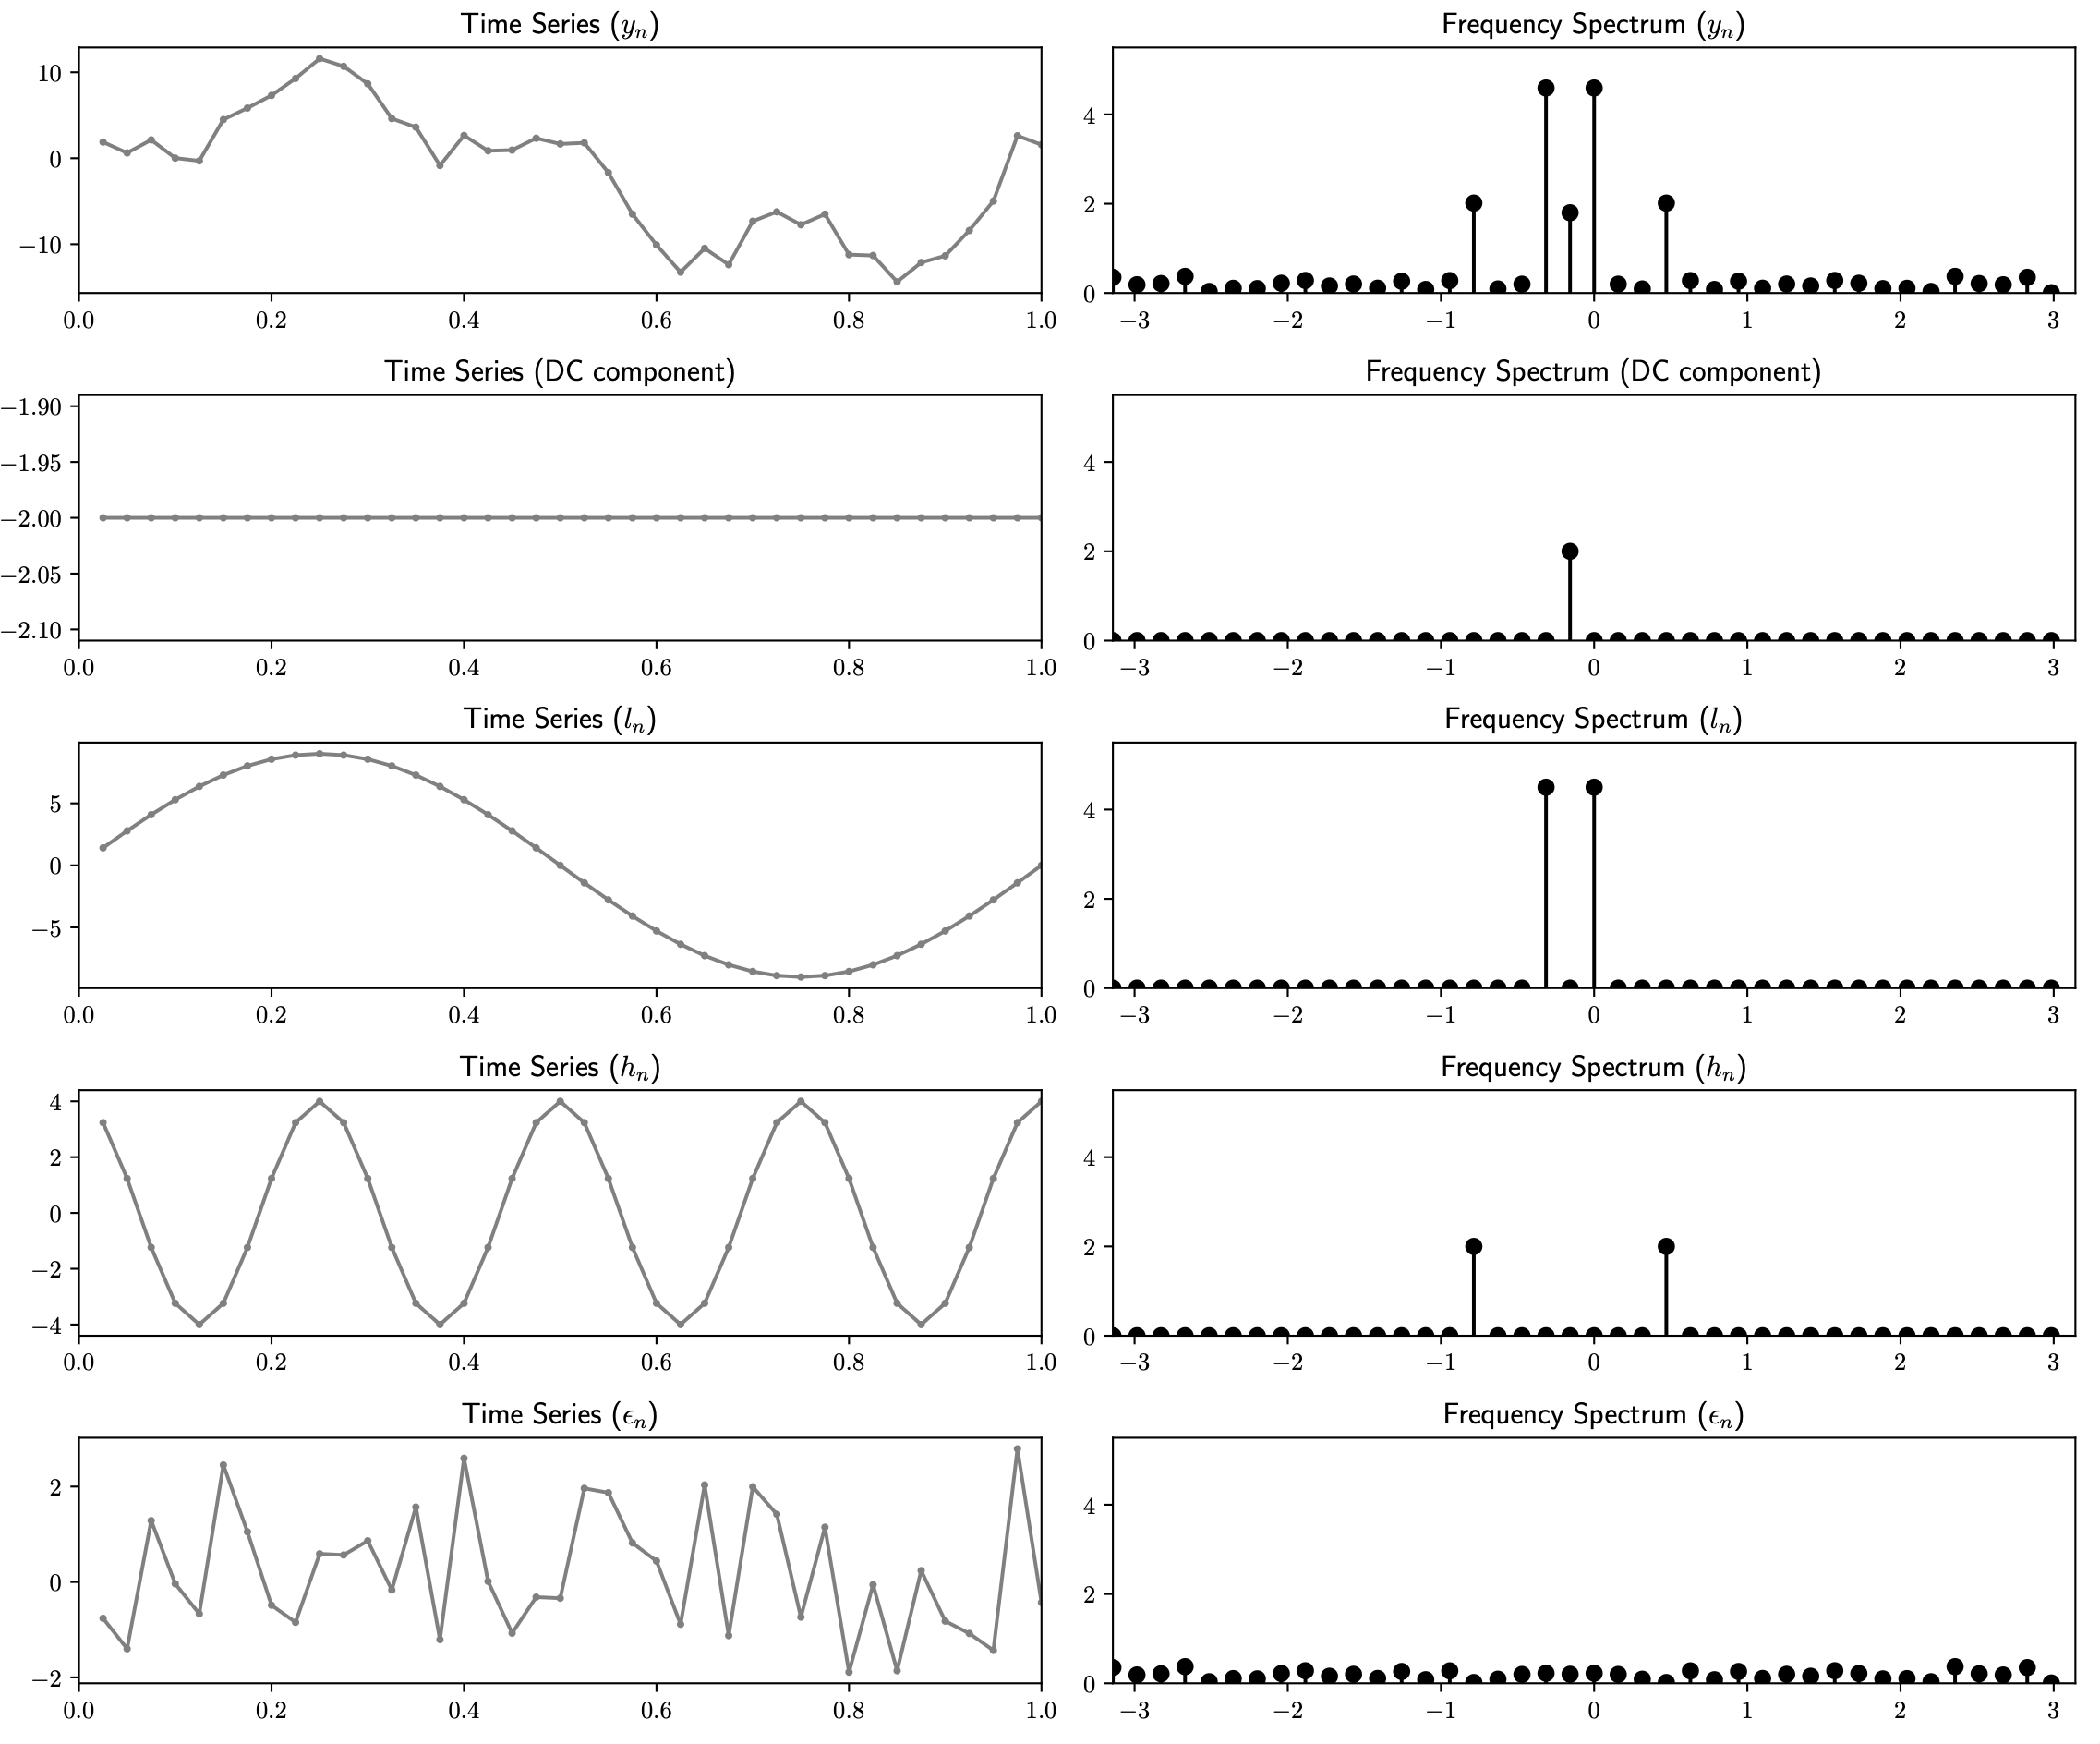


---


### Fourier Transform



**Denoising**



![Figure: The true signal (green) is a sum of two sine waves. Gaussian noise (red, transparent) is added.
The denoised signal (blue) is reconstructed by applying FFT, removing frequency components with power below a threshold, and performing inverse FFT.](figs/FFT_denoised.png){fig-align="center"}


---


### Fourier Transform



**Detection**



![Figure: Time series of the Southern Oscillation Index (SOI) and fish recruitment (1950–1987), showing interannual and seasonal variability with potential correlation.](figs/soi.png)


---


### Fourier Transform



**Detection**



![Figure: Raw periodograms of SOI and recruitment series, showing dominant low-frequency and seasonal components with high variance due to lack of smoothing.](figs/raw_comparison.png)


---


### Fourier Transform



**Detection**



![Figure: Smoothed periodograms of SOI and recruitment series](figs/smoothed_comparison.png)


---


### Fourier Transform


- Many signals in the real world are well represented by sinusoidal functions. FT (or DFT) provides considerable benefits in analyzing such signals.
- However, FT (or DFT) has some limitations. It can only analyze stationary time series, which is disadvantageous for interpreting signals with abrupt changes, such as step functions.


---


### Fourier Transform


![Figure: Fourier series approximation of a step function, showing improved accuracy with an increasing number of terms (1, 3, 7, 31) but persistent Gibbs phenomenon at discontinuities.](figs/Gibbs.png)


---


### Fourier Transform



- Even signals well-suited for representation in sinusoidal functions struggle when applied to signals whose frequency changes over time.


---


### Fourier Transform


:::{.panel-tabset}

### $f(x)$
![Figure: A non-stationary signal exhibiting an abrupt frequency change from $\sin(4x)$ to $\sin(8x)$ at $t=0$, illustrating a common challenge for global frequency analysis.](figs/pw1.png)

### $\int f(x) \sin(4x)dx$
![Figure: Illustration of integrating a fixed sinusoidal basis function, $\sin(4x)$ (red), with a non-stationary signal (gray) that undergoes a frequency change at $t=0$, highlighting the challenge of identifying local frequency content using global Fourier analysis.](figs/pw2.png)

### $\int f(x) \sin(8x)dx$
![Figure: Illustration of integrating a fixed sinusoidal basis function, sin(8x) (red), with a non-stationary signal (gray) that changes frequency at $t=0$, demonstrating how global basis functions capture only average or dominant frequency content over time.](figs/pw3.png)
:::


---


### Fourier Transform


**Chirp signal**

![Figure: A chirp signal, a common example of a non-stationary signal, where the instantaneous frequency continuously increases over time.](figs/chirp.png)


---



### Short-Time Fourier Transform


- Short-time Fourier transform (STFT) is one of many efforts to overcome the aforementioned shortcomings of FT.
- STFT (or DSTFT) divides time series data into smaller segments and then performs FT and DFT on each segment separately. 


---



### Short-Time Fourier Transform


![Figure: Comparison of global Fourier basis functions (top) and time-localized Short-Time Fourier Transform (STFT) basis functions (bottom).](figs/FTSTFTbasis.png)


---



### Short-Time Fourier Transform


- When the entire time series is divided into smaller segments the information about frequency becomes less accurate because there are not enough samples to determine the exact frequency.
- If the entire time series is divided into larger chunks by the window size, the opposite effect occurs; frequency estimates become more accurate, but the information about “which point in time” becomes ambiguous. 


---



### Short-Time Fourier Transform


<div style="overflow-x: auto; overflow-y: auto; max-height: 200vh;">

![Figure: Comparison of time-varying frequency signal (top), its global Discrete Fourier Transform (DFT) spectrum (middle), and its time-frequency spectrogram using Short-Time Fourier Transform (STFT) (bottom).](figs/spectrogram_chirp.png)

</div>


---



### Short-Time Fourier Transform


- From a multiscale perspective, setting a larger window size implies viewing data at a global scale, while setting a smaller window size implies viewing data at a local scale.
- Thus, the window size controls how much to zoom in or out to view data. Hence, the window size of STFT can be interpreted as a multiscale parameter. 


---



### Short-Time Fourier Transform


![Figure: The window size in the Short-Time Fourier Transform (STFT) as a multiscale parameter. A larger window provides a global view of the data, while a smaller window allows for a more localized examination.](figs/STFTscale.png)

---

### Short-Time Fourier Transform

*Uncertainty principle*

![Figure: The time-frequency resolution trade-off, illustrating that improving resolution in one domain (time or frequency) typically comes at the cost of reduced resolution in the other.](figs/STFT_tradeoff.png){fig-align="center"}


---


### Short-Time Fourier Transform

<div style="overflow-x: auto; overflow-y: auto; max-height: 200vh;">
    
![Figure: Comparison of STFT spectrograms for a frequency-hopping signal (top) using a small window (middle) for better time resolution and a large window (bottom) for better frequency resolution.](figs/STFT_hopping.png){fig-align="center"}

</div>

---


### Wavelet


Let's return to the figure below.

![Figure: Fourier series approximation of a step function.](figs/Gibbs.png)

- Such signals also reveal the limitations of the STFT.
- Capturing abrupt changes requires the superposition of a large number of Fourier bases.

---


### Wavelet


![Figure: Harr orthogonal wavelet basis function.](figs/harr.png){fig-align="center"}

---


### Wavelet


![Figure: Haar wavelet approximations of a chirp signal at multiple scales. Fine-scale details diminish as the resolution becomes coarser.](figs/wt_chirp.png){fig-align="center"}


---



### Wavelet


![Figure: Multiscale approximations of the astronaut image.](figs/astronaut_reconstruction.png)

---


### Wavelet


![Figure: Wavelet-based denoising of the astronaut image. From left to right: original grayscale image, noisy image, and denoised result.](figs/wavelet_denoising.png)


---



### Wavelet


![Figure: Wavelet decomposition of the astronaut image up to Level 5 using the Daubechies-4 wavelet.
Each column corresponds to a decomposition level, showing the horizontal (LH), vertical (HL), and diagonal (HH) detail coefficients from top to bottom. The final column shows the approximation (LL) at Level 5, representing the coarsest-scale structure of the image.](figs/wavelet_level.png)

---


### Wavelet


- Wavelets, strong in multi-resolution image analysis, were key in traditional signal processing like edge detection and denoising.
- However, deep learning, particularly CNNs, with their automatic feature learning from data, have largely superseded wavelets in high-dimensional tasks.


# Data-Adaptive Methods



---



### Empirical Mode Decomposition


- Empirical mode decomposition (EMD), introduced by @huang1998empirical, is a data-driven method that decomposes a signal into simpler components known as intrinsic mode functions (IMFs).
- Unlike the basis expansion approach, which depends on predefined basis functions, EMD identifies local oscillations within the signal itself and adaptively extracts them.


---



### Empirical Mode Decomposition


![Figure: This illustrates amplitude modulation, where the sum of two close frequencies produces an envelope modulated at their different frequency.](figs/beat.png)


---



### Empirical Mode Decomposition


- The intrinsic mode function (IMF) seeks to view $2\cos\left(2\pi t_n\right) \cos\left(60\pi t_n\right)$ itself as a single basis.
- The IMF was first proposed by @huang1998empirical and was originally defined using local extrema and zero-crossings. Recently, a definition that incorporates the concept of modulation is widely used [@dragomiretskiy2013variational]. 

---


### Empirical Mode Decomposition


According to this definition, an intrinsic mode function (IMF) is an amplitude-modulated frequency-modulated (AM-FM) signal expressed as 

$$s_k(t) = a_k(t)\cos(\theta_k(t))$$

where $\theta_k(t)$ is a non-decreasing, time-varying phase, and $a_k(t)$ represents a non-negative, time-varying envelope function. Both the envelope function $a_k(t)$ and the instantaneous frequency $\omega_k(t)= \theta_k^{\prime}(t)$ change at a much slower rate than the phase $\theta_k(t)$, ensuring smooth modulation over time.


---


### Empirical Mode Decomposition


<div style="overflow-x: auto; overflow-y: auto; max-height: 200vh;">

![Figure: This illustrates amplitude modulation, where the sum of two close frequencies produces an envelope modulated at their different frequency.](figs/sifting_process.png)

</div>

---


### Empirical Mode Decomposition


---


### Empirical Mode Decomposition


- It does not rely on predefined basis functions.
- The number of basis components (IMFs) is not fixed in advance.
-  Since the basis is not known a priori, traditional projection-based approaches for computing coefficients are not applicable.
-  In fact, the notion of "coefficients" is absent altogether—IMFs are extracted iteratively through sifting rather than via linear expansion.

---


### Empirical Mode Decomposition


- **Nevertheless, EMD clearly embodies the concept of multiscale.**
-  EMD breaks down the data into meaningful components (IMFs).  These components are analyzed together to understand the overall structure.
- This ordering and interpretability match well with @nason2008wavelet’s definition of multiscale methods

> "Multiscale methods are approaches that represent data at multiple scales and managing this representation simultaneously."

---


### Other Methods


**Thick-pen Transform**

- @fryzlewicz2011thick introduced the thick-pen transform (TPT) to visualize time series data using pens of varying thicknesses.
-  TPT operates on a multiscale principle, where thicker pens highlight the coarser-scale characteristics of data, while thinner pens depict the finer-scale details.

---


### Other Methods


![Figure: (Left) A time series plot of white noise followed by a sine wave and (right) a visualization by thick-pen transform with thickness 10.](figs/tpt_firstfig.png)

---


### Other Methods


**Elastic-band Transform**

- If TPT is understood as "drawing" a signal once with a thick pen, Elastic-band Transform (EBT) can be understood as tracing a signal repeatedly with a pencil of the same thickness to create a "dessin." [@choi2023elastic]

- A "dessin" can be made with short, fine touches or long, rough touches, depending on the purpose. In EBT, short or long touches can be adjusted by controlling how consistently the signal is tracked at a regular `interval' $\tau$. 

---


### Other Methods


**Elastic-band Transform**

![Figure: The elastic-band idea](figs/ebt1.png)

---


### Other Methods


**Elastic-band Transform**

![Figure: The elastic-band idea](figs/ebt2.png)

---


### Other Methods


**Elastic-band Transform**

![Figure: The elastic-band idea](figs/ebt3.png)

---


### Other Methods


**Elastic-band Transform**

![Figure: The elastic-band idea](figs/ebt4.png)

---


### Other Methods


**Elastic-band Transform**

![Figure: The elastic-band idea](figs/ebt5.png)

---


### Other Methods


**Elastic-band Transform**

![Figure: The elastic-band idea](figs/ebt6.png)

---


### Other Methods


**Elastic-band Transform**

![Figure: The elastic-band idea](figs/ebt9.png)

---


### Other Methods


**Elastic-band Transform**

![Figure: The elastic-band idea](figs/ebt12.png)

---

### My Recent Research Interests

- Applying multiscale methods to non-Euclidean data.
- Traditional multiscale methods have been developed in Euclidean spaces, where notions such as global vs. local and low vs. high frequency are well-defined.

---

### My Recent Research Interests

![Figure: This figure illustrates wavelet transform results for graphs ${\cal G}_1$, ${\cal G}_2$, and ${\cal G}_3$. Each graph exhibits distinct nodal connectivity, and the lower panels display the spectrum of the corresponding wavelet coefficients, $\hat{f}(\lambda_l)$, for each graph. [@shuman2013emerging]](figs/noneuclid/fig4_rev_3graph.png)

---

### My Recent Research Interests

- However, recent data types—e.g., manifolds, graphs, and topological structures are non-Euclidean, where these notions may flip or become ambiguous.
- I am currently exploring how to develop multiscale frameworks suitable for such domains.


# Q&A Session


---

## References {.scrollable}

::: {#refs}
:::